### Importing required libraries

In [184]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet,ElasticNetCV

<hr>

### Loading the data

In [119]:
data=pd.read_csv("Admission_Prediction.csv")

<hr>

### EDA and Pre-processing

##### Basic Analysis

In [120]:
print("First 5 instances - \n",end="\n")
data.head(5)

First 5 instances - 



,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


1. Independent attributes: Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research<br>
2. Target attributes: Chance of Admit 

In [121]:
# Pandas Profiling

# pf=ProfileReport(data)
# pf.to_widgets()

In [122]:
# Overview of data
print("Shape of data: (instances,attributes) - ",data.shape,end="\n\n")
print("Information about each attribute in the data -",end="\n\n")
data.info()

Shape of data: (instances,attributes) -  (500, 9)

Information about each attribute in the data -

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


1. Serial No. is irrelevant feature for predicting Chance of Admit 
2. There are missing values in dataset
3. GRE Score, TOEFL Score, SOP, LOR, CGPA, Chance of Admit - continous <br>
   University Rating, Research - discrete 

In [123]:
# Variables  - STATISTICAL ANALYSIS
for i in data.columns:
    d=data[i]
    result={}
    result["attribute"]=i
    result["missing"]=d.isnull().sum()
    result["distinct"]=len(d.unique())
    result["mean"]=d.mean()
    result["median"]=d.median()
    result["min"]=d.min()
    result["max"]=d.max()
    print(result)

data.describe(include="all")

{'attribute': 'Serial No.', 'missing': 0, 'distinct': 500, 'mean': 250.5, 'median': 250.5, 'min': 1, 'max': 500}
{'attribute': 'GRE Score', 'missing': 15, 'distinct': 50, 'mean': 316.55876288659795, 'median': 317.0, 'min': 290.0, 'max': 340.0}
{'attribute': 'TOEFL Score', 'missing': 10, 'distinct': 30, 'mean': 107.18775510204081, 'median': 107.0, 'min': 92.0, 'max': 120.0}
{'attribute': 'University Rating', 'missing': 15, 'distinct': 6, 'mean': 3.1216494845360825, 'median': 3.0, 'min': 1.0, 'max': 5.0}
{'attribute': 'SOP', 'missing': 0, 'distinct': 9, 'mean': 3.374, 'median': 3.5, 'min': 1.0, 'max': 5.0}
{'attribute': 'LOR', 'missing': 0, 'distinct': 9, 'mean': 3.484, 'median': 3.5, 'min': 1.0, 'max': 5.0}
{'attribute': 'CGPA', 'missing': 0, 'distinct': 184, 'mean': 8.576439999999998, 'median': 8.56, 'min': 6.8, 'max': 9.92}
{'attribute': 'Research', 'missing': 0, 'distinct': 2, 'mean': 0.56, 'median': 1.0, 'min': 0, 'max': 1}
{'attribute': 'Chance of Admit', 'missing': 0, 'distinct': 

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


1. GRE (0-340)  TOEFL (0-120) 
2. SOP, LOR (1-5)   CGPA (0-10)
3. University Rating (1-5)  Research  (0-1)  : Discrete


##### Dropping irrelevent attributes

In [124]:
# Drop Serial No. attribute from dataset 
serial_number=data["Serial No."]
data.drop("Serial No.",axis=1,inplace=True)

##### Splitting the attributes

In [125]:
# Splitting the attributes into numerical-continous and numerical-discrete
num_cont=list(data.columns)
num_dis=[]

num_cont.remove("University Rating")
num_dis.append("University Rating")
num_cont.remove("Research")
num_dis.append("Research")

print("Numerical - Continous variables \n",num_cont,end="\n\n")
print("Numerical - Discrete variables \n",num_dis,end="\n\n")

Numerical - Continous variables 
 ['GRE Score', 'TOEFL Score', 'SOP', 'LOR', 'CGPA', 'Chance of Admit']

Numerical - Discrete variables 
 ['University Rating', 'Research']



##### Handling missing values

In [126]:
# Missing values count 
data.isnull().sum()

GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

1. GRE Score and TOEFL is numerical - continous attribute.(replace missing values by mean)
2. University Rating is numerical - discrete attribute.(replace missing value by mode)

In [127]:
# Handling numerical - continous type attributes in data
data[num_cont]=data[num_cont].fillna(data[num_cont].mean())

# Handling numerical - discrete type attributes in data
data["University Rating"]=data["University Rating"].fillna(data["University Rating"].mode()[0])

##### Handling outliers

In [128]:
# Funtion to calculate number of outliers along with upperfence and lowerfence values

def outlier(data,flag):
    outlier_count=0
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    iqr=q3-q1
    upperfence=q3+(iqr*1.5)
    lowerfence=q1-(iqr*1.5)
    if flag=="count":
        for i in data:
            if i> upperfence or i<lowerfence:
                outlier_count=outlier_count+1
        return outlier_count
    elif flag=="boundary":
        return lowerfence,upperfence

In [129]:
# Obtaining the count of outliers present in each attribute of the dataset

outlier_dic={}
for i in num_cont:
    count=outlier(data[i],"count")
    if count>0:
        outlier_dic[i]=count
print(outlier_dic)

{'LOR': 1, 'Chance of Admit': 2}


<AxesSubplot:>

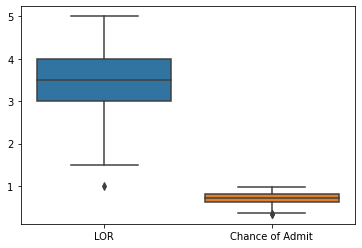

In [130]:
# Visualizing the outliers count

sns.boxplot(data=data[outlier_dic.keys()])

In [131]:
# Getting the row details where outliers are present

lw_lor,up_lor=outlier(data["LOR"],"boundary")
lor_outlier=data[(data["LOR"]<lw_lor) | (data["LOR"]>up_lor)]

lw_ot,up_ot=outlier(data["Chance of Admit"],"boundary")
coa_outlier=data[(data["Chance of Admit"]<lw_ot) | (data["Chance of Admit"]>up_ot)]

In [158]:
# Dropping the outliers from data

data.drop(lor_outlier.index,inplace=True)
data.drop(coa_outlier.index,inplace=True)

##### Univariate analysis 

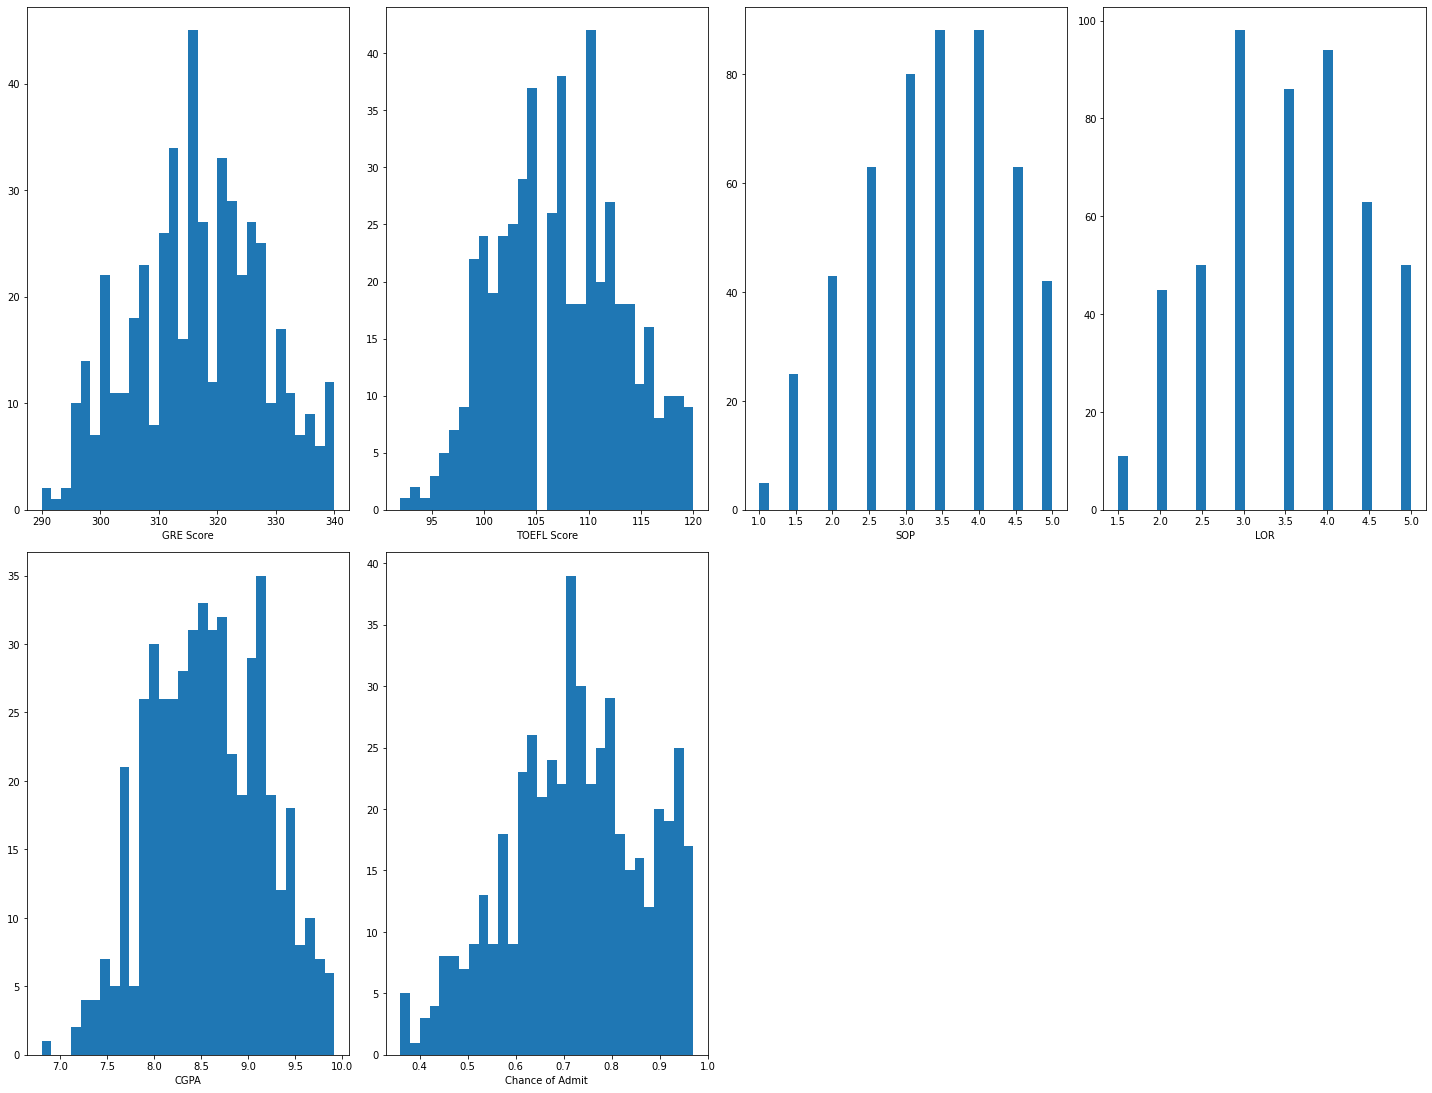

In [159]:
# Distribution of numerical attributes in dataset

plt.figure(figsize=(20,30))
plotnumber=1

for i in num_cont:
    ax = plt.subplot(4,4,plotnumber)
    plt.hist(data[i],bins=30)
    plt.xlabel(i)
    plotnumber+=1
plt.tight_layout()

##### Bi variate analysis

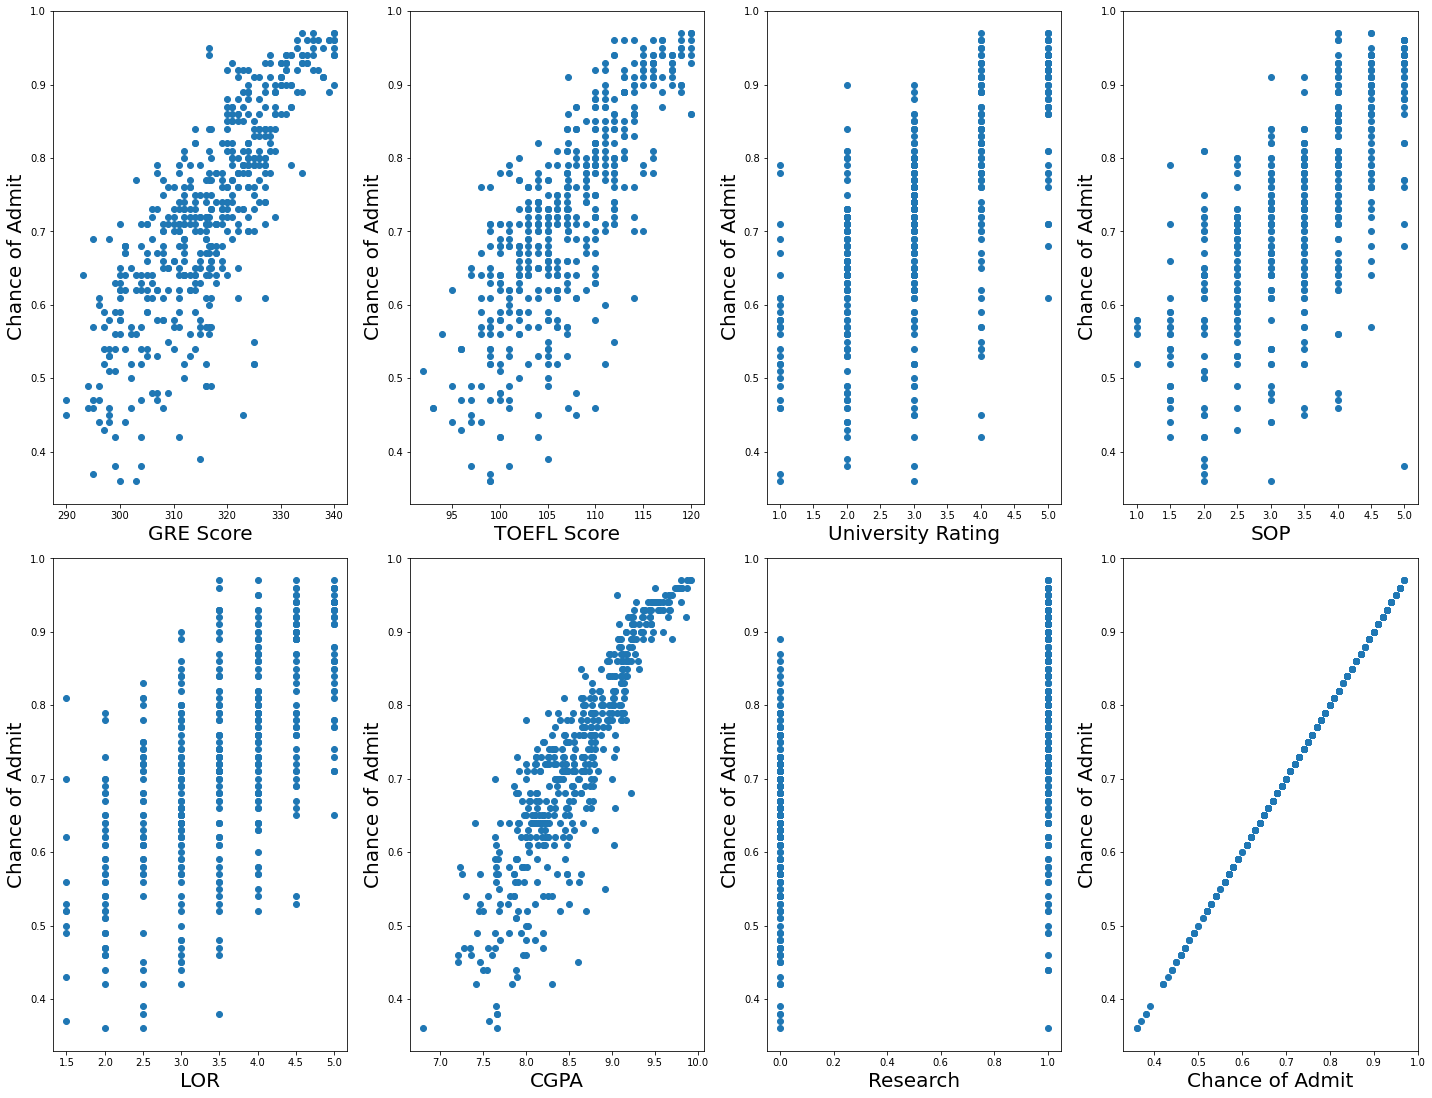

In [160]:
# Relation between the attribute and target variable 

plt.figure(figsize=(20,30))
plotnumber = 1

for column in data.columns[0:8]:
    ax = plt.subplot(4,4,plotnumber)
    plt.scatter(data[column],data["Chance of Admit"])
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

It looks like CGPA, GRE score and TOEFL score are more correlated with chance of admit when compared to others

##### Normalizing the X features

In [161]:
# Splitting independent and dependent features
X=data.iloc[:,:-1]
Y=data["Chance of Admit"]

In [162]:
# Normalization
# we are following standard scaler (Calculates Z score - mean=0 and variance=1)
scaler =StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.8428004 ,  1.79103769,  0.77621378, ...,  1.097138  ,
         1.77718755,  0.88034084],
       [ 0.66437771, -0.04255379,  0.77621378, ...,  1.097138  ,
         0.47883554,  0.88034084],
       [-0.01015481, -0.5426242 , -0.11267619, ...,  0.00767229,
        -0.96932631,  0.88034084],
       ...,
       [ 1.2082651 ,  2.12441796,  1.66510376, ...,  1.64187086,
         1.62737771,  0.88034084],
       [-0.42339709, -0.70931433,  0.77621378, ...,  1.64187086,
        -0.25356815, -1.13592367],
       [ 0.9363214 ,  0.95758701,  0.77621378, ...,  1.097138  ,
         0.7618097 , -1.13592367]])

In [163]:
X_scaled.shape

(497, 7)

##### Multi-Collinearity check

In [139]:
# VIF factor

vif = pd.DataFrame()
vif_values=[]
for i in range(X_scaled.shape[1]):
    vif_values.append(variance_inflation_factor(X_scaled,i))
vif["VIF"]=vif_values
vif["Features"] = X.columns
print(vif)


        VIF           Features
0  4.092402          GRE Score
1  3.728575        TOEFL Score
2  2.496023  University Rating
3  2.776298                SOP
4  2.008906                LOR
5  4.579456               CGPA
6  1.448756           Research


We donot have multicollinearity scenario in our dataset.

<hr>

### Splitting the data into Training and Testing data


In [140]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size = 0.25,random_state=212)

In [141]:
print("X train shape",X_train.shape)
print("Y train shape",Y_train.shape)
print("X test shape",X_test.shape)
print("Y test shape",Y_test.shape)

X train shape (372, 7)
Y train shape (372,)
X test shape (125, 7)
Y test shape (125,)


<hr>

### Training the Model

In [142]:
regression = LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression()

<hr>

##### Evaluating the model

In [143]:
print("Regression co-efficients: ",regression.coef_)
print("Regression intercept: ",regression.intercept_)

Regression co-efficients:  [0.01501573 0.01720218 0.00230775 0.00450696 0.01723704 0.07709479
 0.01381228]
Regression intercept:  0.7204725928646589


In [144]:
print("Regression Score on Training dataset: ",regression.score(X_train,Y_train)) # Returns R^2 value
print("Regression Score on Testing dataset: ",regression.score(X_test,Y_test))

Regression Score on Training dataset:  0.8192537365992656
Regression Score on Testing dataset:  0.8139290009567017


In [145]:
# Training error

train_pred=regression.predict(X_train)
train_error=mean_squared_error(Y_train,train_pred)
print("Training error: ",train_error)

# Testing error

test_pred=regression.predict(X_test)
test_error=mean_squared_error(Y_test,test_pred)
print("Testing error: ",test_error)


Training error:  0.0036479882871288897
Testing error:  0.002950501335319318


It doesnot seem to be a overfit model.

<hr>

### Regularization

##### ELASTIC Regression

In [193]:
# Finding optimal values of hyper parameters

# Alpha: constant that multiplies the penalty terms (alpha=0: OLS Regression)
# l_ratio: elastic mixing parameter (0: L2 penality 1:L1 penality (0-1): combination of L1 and L2)

elastic_cv=ElasticNetCV()
elastic_cv.fit(X_train,Y_train)
print("Alpha value: ",elastic_cv.alpha_)
print("l1_ratio value: ",elastic_cv.l1_ratio)

Alpha value:  0.0002503771960940711
l1_ratio value:  0.5


In [194]:
elasticnet_reg = ElasticNet(alpha = elastic_cv.alpha_,l1_ratio=elastic_cv.l1_ratio)
elasticnet_reg.fit(X_train, Y_train)
elasticnet_reg.score(X_test, Y_test)

0.8142012565584194

In [198]:
print("Elastic-net co-efficients: ",elasticnet_reg.coef_)
print("Elastic-net intercept: ",elasticnet_reg.intercept_)

Elastic-net co-efficients:  [0.01502537 0.01715257 0.00229542 0.00449572 0.01717945 0.0770783
 0.01373939]
Elastic-net intercept:  0.7204691691604538


<hr>

### Saving the Model

In [199]:
# saving the model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

scalarname = 'standardization.pickle'
pickle.dump(scaler,open(scalarname,'wb'))

<hr>

### Predicting the Result

In [200]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict(scaler.transform([[300,110,5,5,5,10,1]]))
a

C:\Users\Teju\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0.93928919])

<hr>